### Знакомство с тетрадями IPython / Jupyter

IPython - мощное удобное средство для исследований, переноса и распространения кода на языке Python.

Код выполняется в ячейках, и существует возможность сохранения кода и результатов в тетради JSON-формата.

Также IPython предоставляет систему интерактивно выполняемых "магических" команд.

Магические команды делятся на два типа:

- Строковые магические команды: имеют префикс из одного символа % и охватывают только текущую строку кода.
- Ячейковые магические команды: имеют префикс из двух символов %% и охваьывают всю текущую ячейку IPython.

#### Различные варианты справок

In [1]:
?

In [2]:
%quickref

In [3]:
%magic

In [4]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [5]:
text = 'Hello'
text?

#### Отладка

In [6]:
name = 'Johnny'
greeting = text + ', ' + name
del greeting[100]

TypeError: 'str' object doesn't support item deletion

In [7]:
%debug

> <ipython-input-6-517329e6739c>(3)<module>()
      1 name = 'Johnny'
      2 greeting = text + ', ' + name
----> 3 del greeting[100]

ipdb> greeting
'Hello, Johnny'
ipdb> len(greeting)
13
ipdb> q


#### Связь с Shell-ом

In [8]:
# выполнить Shell-команду (например, в Windows: DIR, DATE, PING и т.д.)
# !DATE /T    # --- for windows cmd shell
!date +%D

05/02/17


In [9]:
%%bash
date +%d/%m/%Y

# for windows:
# %%cmd
# DATE /T

02/05/2017


#### Замеры времени и профайлинг

In [10]:
def range_sum(a):
    res = 0
    for elem in a:
        res += elem
    return res    


import numpy as np

nums = np.arange(10**4)

%timeit np.sum(nums)
%timeit range_sum(nums)

The slowest run took 35.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.91 µs per loop
1000 loops, best of 3: 1.04 ms per loop


In [11]:
# профайлинг
stats = %prun -r -q np.fft.fft(nums)
stats.sort_stats('cumtime').print_stats(20)

          16 function calls in 0.004 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.004    0.004 {built-in method builtins.exec}
        1    0.000    0.000    0.003    0.003 <string>:1(<module>)
        1    0.000    0.000    0.003    0.003 fftpack.py:100(fft)
        1    0.002    0.002    0.002    0.002 {method 'astype' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.001    0.001 fftpack.py:46(_raw_fft)
        1    0.001    0.001    0.001    0.001 {built-in method numpy.fft.fftpack_lite.cffti}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.fft.fftpack_lite.cfftf}
        2    0.000    0.000    0.000    0.000 numeric.py:414(asarray)
        2    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.array}
        1    0.000    0.000    0.000    0.000 fftpack.py:93(_unitary)
        1    0.000    0.000    0.000    0.000 {method 'appen

#### Справка по функциям модуля

In [12]:
%pdef np.convolve

 np.convolve(a, v, mode='full')
 

In [13]:
%pdoc np.where

#### Информация о рабочем пространстве (интерактивных объектах)

In [14]:
%who

greeting	 name	 np	 nums	 range_sum	 stats	 text	 


In [15]:
%whos

Variable    Type        Data/Info
---------------------------------
greeting    str         Hello, Johnny
name        str         Johnny
np          module      <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
nums        ndarray     10000: 10000 elems, type `int64`, 80000 bytes
range_sum   function    <function range_sum at 0x7fc140376378>
stats       Stats       <pstats.Stats object at 0x7fc148070eb8>
text        str         Hello


#### Внедрение графиков matplotlib

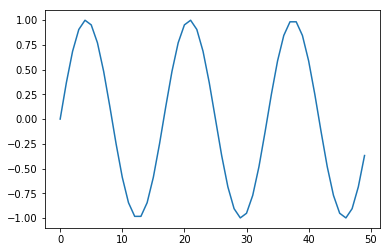

In [17]:
# set matplotlib to inline or interactive (qt) mode
%matplotlib inline

import matplotlib.pyplot as plt

t = np.arange(50)
x = np.sin(2 * np.pi * 0.06 * t)
plt.plot(x)

#### Форматирование

Поддерживается форматирование LaTeX.
Если шрифт в формулах покажется маленьким, можно его увеличить вот так:

In [1]:
# %%HTML
# <style>.MathJax {font-size: 120%;}</style>

Примеры формул:

\begin{equation}
H(z)=\frac{\sum\limits_{k=0}^Na_kx[k]}{1-\sum\limits_{m=1}^Mb_my[m]}
\\
\oint\limits_C {E \cdot d\ell = - \frac{d}{{dt}}} \int\limits_S {B_n dA}
\end{equation}


In [20]:
# выводит историю ранее выполненных команд
%history

?
%quickref
%magic
%lsmagic
text = 'Hello'
text?
name = 'Johnny'
greeting = text + ', ' + name
del greeting[100]
%debug
# выполнить Shell-команду (например, в Windows: DIR, DATE, PING и т.д.)
# !DATE /T    # --- for windows cmd shell
!date +%D
%%bash
date +%d/%m/%Y

# for windows:
# %%cmd
# DATE /T
def range_sum(a):
    res = 0
    for elem in a:
        res += elem
    return res    


import numpy as np

nums = np.arange(10**4)

%timeit np.sum(nums)
%timeit range_sum(nums)
# профайлинг
stats = %prun -r -q np.fft.fft(nums)
stats.sort_stats('cumtime').print_stats(20)
%pdef np.convolve
%pdoc np.where
%who
%whos
# set matplotlib to inline or interactive (qt) mode
%matplotlib inline

import matplotlib.pyplot as plt

t = np.arange(50)
x = np.sin(2 * np.pi * 0.06 * t)
plt.plot(x)
# set matplotlib to inline or interactive (qt) mode
%matplotlib inline

import matplotlib.pyplot as plt

t = np.arange(50)
x = np.sin(2 * np.pi * 0.06 * t)
plt.plot(x)
%%HTML
<style>.MathJax {font-size: 170%;}</sty

In [21]:
# сброс рабочего пространства
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Документация по встроенным magic командам Jupyter/IPython:

https://ipython.org/ipython-doc/3/interactive/magics.html